In [234]:
# imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime as dt
from pathlib import Path
from MCForecastTools import MCSimulation
import pylab
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# load env file
load_dotenv("LT.env")

True

In [56]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [57]:
# initialize variables for api
ticker = "GLD"
timeframe = "1D"
current_date = datetime.datetime.now()
start_date = datetime.datetime(current_date.year-5, current_date.month, current_date.day)

In [58]:
# read in data
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=current_date,
    limit=1000
).df

#ticker_data

In [271]:
#Read BTC Data; drop columns not used and adjust header to match data from Alpaca
btc_path = Path("cleaned_btc_data.csv")
btc = pd.read_csv(btc_path, index_col="Timestamp",parse_dates=True, infer_datetime_format=True).drop(['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price'], 1)
btc.columns = pd.MultiIndex.from_tuples([('BTC', 'close')])
btc.head()

,BTC
,close
Timestamp,
2011-12-31,4.482500
2012-01-01,4.806667
2012-01-02,5.000000
2012-01-03,5.252500
2012-01-04,5.223333


In [277]:
#Read Gold data, drop columns not used
gold_path = Path("gold_data.csv")
gold = pd.read_csv(gold_path,parse_dates=True, infer_datetime_format=True, index_col=0, header=[0,1])
gold = gold.drop(gold.columns[[0,1,2,4]], axis=1)
gold.head()

,GLD
,close
2017-05-18,118.8200
2017-05-19,119.4100
2017-05-22,119.8953
2017-05-23,119.1100
2017-05-24,119.6300


In [279]:
#Concatenate Gold and Bitcoin Data and save to CSV
gold_btc = pd.concat([gold, btc], axis="columns", join="inner")
gold_btc.to_csv('gold_btc.csv')
gold_btc

,GLD,BTC
,close,close
2017-05-18,118.8200,1825.549520
2017-05-19,119.4100,1926.201510
2017-05-22,119.8953,2110.906591
2017-05-23,119.1100,2192.909827
2017-05-24,119.6300,2367.351234
...,...,...
2021-03-25,161.8100,52125.759256
2021-03-26,162.2700,53243.124454
2021-03-29,160.3500,56915.629993


In [186]:
#MonteCarlo runs
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_1 = MCSimulation(
    portfolio_data = gold_btc,
    weights = [0.1,0.9],
    num_simulation = 500,
    num_trading_days = 252*30
)

mc_1.portfolio_data.head()


GLD                       BTC             
               close daily_return        close daily_return
2017-05-18  118.8200          NaN  1825.549520          NaN
2017-05-19  119.4100     0.004965  1926.201510     0.055135
2017-05-22  119.8953     0.004064  2110.906591     0.095891
2017-05-23  119.1100    -0.006550  2192.909827     0.038847
2017-05-24  119.6300     0.004366  2367.351234     0.079548

In [187]:
mc_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.036805e+00,9.161888e-01,1.025169e+00,1.027128e+00,1.039983e+00,9.950677e-01,9.986369e-01,9.792246e-01,1.041314e+00,1.022742e+00,...,9.694960e-01,9.856542e-01,1.040557e+00,9.839958e-01,9.900284e-01,9.927740e-01,1.023720e+00,9.486075e-01,1.022597e+00,1.042416e+00
2,1.024367e+00,9.446275e-01,1.027357e+00,9.997435e-01,1.113895e+00,1.006200e+00,9.763740e-01,1.043846e+00,1.071084e+00,1.019864e+00,...,9.449305e-01,9.577996e-01,1.054167e+00,9.318677e-01,8.862701e-01,1.021483e+00,9.847276e-01,9.331389e-01,1.054330e+00,1.018504e+00
3,9.666760e-01,9.505179e-01,1.087719e+00,1.067281e+00,1.090246e+00,1.055044e+00,9.670869e-01,1.073495e+00,1.055752e+00,1.036204e+00,...,9.333525e-01,1.006545e+00,1.086775e+00,9.821635e-01,8.660641e-01,1.061097e+00,9.731002e-01,9.720531e-01,1.080559e+00,1.050301e+00
4,9.952675e-01,9.456392e-01,1.088859e+00,1.059095e+00,1.129498e+00,9.883715e-01,1.012583e+00,1.096053e+00,1.077827e+00,1.015127e+00,...,9.593755e-01,1.005567e+00,1.097140e+00,1.006239e+00,8.137669e-01,1.116108e+00,9.727550e-01,9.650276e-01,1.077311e+00,1.030540e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.834473e+10,6.694577e+08,7.807294e+09,5.185161e+09,3.680272e+09,1.855294e+13,7.550855e+10,8.262631e+10,8.469020e+09,6.808397e+10,...,4.054090e+09,7.788985e+11,6.926826e+10,1.518516e+08,1.070243e+11,3.387666e+11,9.200017e+11,7.958654e+13,8.467668e+06,2.657771e+12
7557,1.974784e+10,6.861023e+08,8.180036e+09,5.404881e+09,3.674800e+09,1.806781e+13,8.461064e+10,8.667284e+10,9.204834e+09,6.953173e+10,...,4.235153e+09,7.988947e+11,6.971825e+10,1.548355e+08,1.053933e+11,3.549096e+11,9.888015e+11,8.183774e+13,8.391940e+06,2.730197e+12
7558,1.855796e+10,7.197050e+08,7.957560e+09,5.427301e+09,3.963984e+09,1.729568e+13,7.868061e+10,8.500337e+10,9.352831e+09,6.940599e+10,...,3.952849e+09,7.336549e+11,6.845696e+10,1.663763e+08,9.985118e+10,3.511470e+11,1.017734e+12,8.591101e+13,8.203576e+06,2.748536e+12
7559,1.853104e+10,7.529428e+08,8.366133e+09,5.382516e+09,4.008463e+09,1.747629e+13,7.925856e+10,8.142501e+10,9.730601e+09,7.093827e+10,...,3.899994e+09,7.297834e+11,6.805730e+10,1.618829e+08,9.859938e+10,3.476618e+11,1.043081e+12,8.745375e+13,8.234253e+06,2.513499e+12


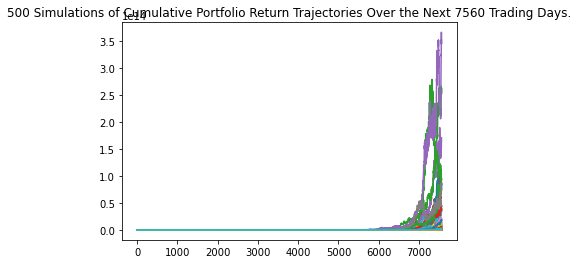

In [263]:
line_plot = mc_1.plot_simulation()

In [265]:
line_plot.set_yscale('log')

In [267]:
fig = line_plot.figure

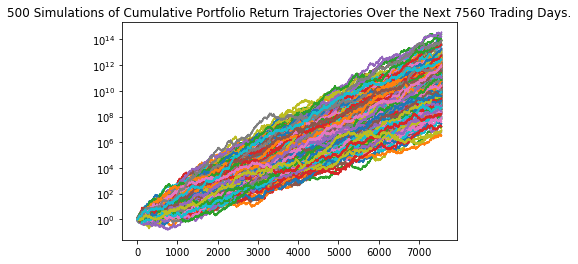

In [268]:
fig

In [270]:
fig.savefig('test_fig.png', bbox_inches='tight', pad_inches=0.1)

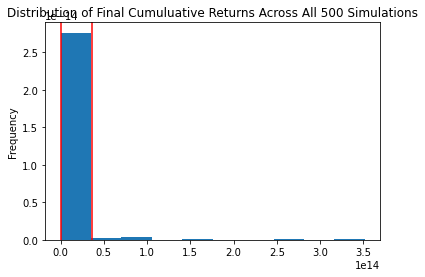

In [244]:
dist_plot = mc_1.plot_distribution()

In [245]:
mc_2 = MCSimulation(
    portfolio_data = gold_btc,
    weights = [0.9,0.1],
    num_simulation = 500,
    num_trading_days = 252*30
)

mc_2.portfolio_data.head()

GLD                       BTC             
               close daily_return        close daily_return
2017-05-18  118.8200          NaN  1825.549520          NaN
2017-05-19  119.4100     0.004965  1926.201510     0.055135
2017-05-22  119.8953     0.004064  2110.906591     0.095891
2017-05-23  119.1100    -0.006550  2192.909827     0.038847
2017-05-24  119.6300     0.004366  2367.351234     0.079548

In [246]:
mc_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996231,1.003285,1.010755,1.003736,0.995206,1.001822,0.996990,1.005773,1.002296,0.986647,...,1.007162,0.999494,0.997418,0.994826,0.986736,0.998529,0.986598,1.013878,1.002540,1.013621
2,1.008137,0.992408,1.017100,1.018061,0.994092,1.004478,0.969798,0.995551,1.010548,0.985371,...,1.014138,1.004141,1.004691,0.988449,0.989286,0.999777,0.988670,1.000201,1.006356,1.002648
3,1.006038,0.999711,1.016519,1.038099,1.005193,1.002322,0.972545,0.999454,1.000701,1.003219,...,1.020145,1.006801,1.007963,0.991982,1.003217,1.009803,0.985176,1.005818,1.006436,1.017660
4,1.002443,1.005380,1.011785,1.052180,1.014634,1.014961,0.972724,1.011687,1.010727,0.993250,...,1.021772,0.999886,1.023067,0.981742,0.995438,1.007170,0.970997,1.007772,1.023144,1.012523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,593.632316,127.320997,31.410758,434.456236,146.195351,311.621290,565.057247,129.110197,276.608424,391.542742,...,121.863594,170.666239,290.102158,190.064807,184.416408,497.660638,366.303989,41.501267,258.910851,100.697939
7557,589.970448,125.910213,31.233994,428.350630,146.154806,313.271033,566.747260,128.696527,276.056837,386.078836,...,122.183256,172.840503,291.937080,189.570784,185.553862,502.692483,373.917362,41.400387,259.225528,101.035570
7558,600.968068,124.569345,31.254756,427.735948,145.889612,313.200227,563.749239,126.620867,273.581064,387.911296,...,122.429150,172.952458,291.284623,189.648368,183.248676,508.430272,376.001231,41.335865,262.393992,100.775389
7559,602.854104,123.934077,30.892947,428.237730,145.424423,313.318824,564.736475,128.182959,275.008995,390.772913,...,123.394456,173.260001,290.486607,191.180106,185.031538,515.682979,373.291076,41.569391,263.551293,100.510063


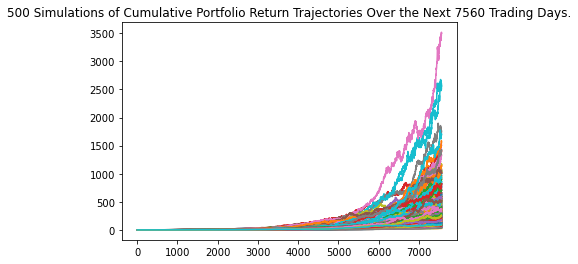

In [251]:
line_plot_2 = mc_2.plot_simulation()


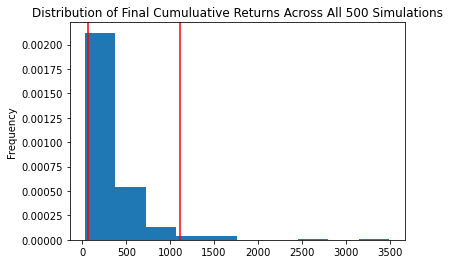

In [249]:
dist_plot = mc_2.plot_distribution()

In [252]:
line_plot_2.set_yscale('log')

In [253]:
fig_2 = line_plot_2.figure

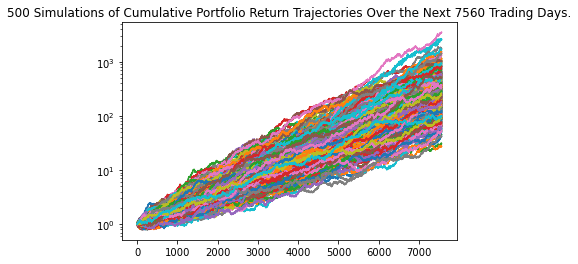

In [254]:
fig_2

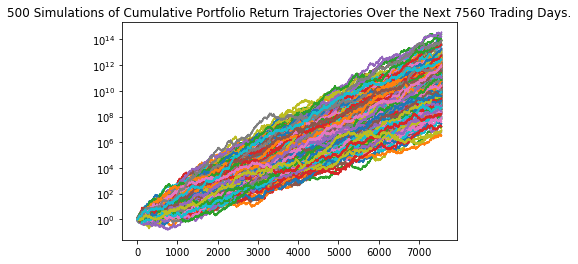

In [255]:
fig